### 1. Data Preprocessing

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science_Public/gold_standard_generation'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
 significant_genes_report_corrected.csv         TCGA.PCPG.sampleMap_HiSeqV2_PANCAN.gz
'TCGA_Bladder_Cancer_(BLCA)'		        TCGA.PCPG.sampleMap_PCPG_clinicalMatrix
 TCGA.BRCA.sampleMap_BRCA_clinicalMatrix        TCGA.SARC.sampleMap_HiSeqV2_PANCAN
 TCGA.BRCA.sampleMap_HiSeqV2_PANCAN	        TCGA.SARC.sampleMap_SARC_clinicalMatrix
'TCGA_Kidney_Clear_Cell_Carcinoma_(KIRC)'       TCGA.THYM.sampleMap_HiSeqV2_PANCAN
'TCGA_Kidney_Papillary_Cell_Carcinoma_(KIRP)'   TCGA.THYM.sampleMap_THYM_clinicalMatrix
'TCGA_Melanoma_(SKCM)'			        TCGA.UCEC.sampleMap_HiSeqV2_PANCAN.gz
 TCGA.MESO.sampleMap_HiSeqV2_PANCAN	        TCGA.UCEC.sampleMap_UCEC_clinicalMatrix
 TCGA.MESO.sampleMap_MESO_clinicalMatrix        TCGA.UCS.sampleMap_HiSeqV2_PANCAN.gz
'TCGA_Ocular_melanomas_(UVM)'		        TCGA.UCS.sampleMap_UCS_clinicalMatrix


In [2]:
!pip install sparse_lmm

In [3]:
# Read file

import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.UCS.sampleMap_UCS_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.UCS.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [4]:
clinical_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,aln_pos_ihc,...,_GENOMIC_ID_TCGA_UCS_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_UCS_mutation_curated_broad_gene,_GENOMIC_ID_TCGA_UCS_gistic2thd,_GENOMIC_ID_TCGA_UCS_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_UCS_mutation_broad_gene,_GENOMIC_ID_TCGA_UCS_PDMRNAseqCNV,_GENOMIC_ID_TCGA_UCS_gistic2,_GENOMIC_ID_TCGA_UCS_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_UCS_hMethyl450,_GENOMIC_ID_TCGA_UCS_PDMRNAseq
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-N5-A4R8-01,NaN,TCGA-N5-A4R8-01,TCGA-N5-A4R8,TCGA Uterine Carcinosarcoma (UCS),uterine carcinosarcoma,Uterus,NaN,NaN,65,0.0,...,03833ac9-5483-4ae8-a108-24f2aa63feed,TCGA-N5-A4R8-01A-11D-A28R-08,NaN,03833ac9-5483-4ae8-a108-24f2aa63feed,TCGA-N5-A4R8-01A-11D-A28R-08,NaN,NaN,TCGA-N5-A4R8-01A-11D-A28R-08,TCGA-N5-A4R8-01A-11D-A28S-05,TCGA-N5-A4R8-01
TCGA-N5-A4RA-01,MSS,TCGA-N5-A4RA-01,TCGA-N5-A4RA,TCGA Uterine Carcinosarcoma (UCS),uterine carcinosarcoma,Uterus,NaN,NaN,63,0.0,...,8c610081-9e45-4970-bff6-966aff8a7948,TCGA-N5-A4RA-01A-11D-A28R-08,TCGA-N5-A4RA-01A-11D-A28Q-01,8c610081-9e45-4970-bff6-966aff8a7948,TCGA-N5-A4RA-01A-11D-A28R-08,TCGA-N5-A4RA-01,TCGA-N5-A4RA-01A-11D-A28Q-01,TCGA-N5-A4RA-01A-11D-A28R-08,TCGA-N5-A4RA-01A-11D-A28S-05,TCGA-N5-A4RA-01
TCGA-N5-A4RD-01,MSS,TCGA-N5-A4RD-01,TCGA-N5-A4RD,TCGA Uterine Carcinosarcoma (UCS),uterine carcinosarcoma,Uterus,NaN,NaN,69,0.0,...,960b6453-c8a5-4f0d-9b4e-85406407f297,TCGA-N5-A4RD-01A-11D-A28R-08,TCGA-N5-A4RD-01A-11D-A28Q-01,960b6453-c8a5-4f0d-9b4e-85406407f297,TCGA-N5-A4RD-01A-11D-A28R-08,TCGA-N5-A4RD-01,TCGA-N5-A4RD-01A-11D-A28Q-01,TCGA-N5-A4RD-01A-11D-A28R-08,TCGA-N5-A4RD-01A-11D-A28S-05,TCGA-N5-A4RD-01
TCGA-N5-A4RF-01,MSS,TCGA-N5-A4RF-01,TCGA-N5-A4RF,TCGA Uterine Carcinosarcoma (UCS),uterine carcinosarcoma,Uterus,NaN,NaN,68,0.0,...,8e485caf-30e1-4ccd-8325-4c17da610fff,TCGA-N5-A4RF-01A-11D-A28R-08,TCGA-N5-A4RF-01A-11D-A28Q-01,8e485caf-30e1-4ccd-8325-4c17da610fff,TCGA-N5-A4RF-01A-11D-A28R-08,TCGA-N5-A4RF-01,TCGA-N5-A4RF-01A-11D-A28Q-01,TCGA-N5-A4RF-01A-11D-A28R-08,TCGA-N5-A4RF-01A-11D-A28S-05,TCGA-N5-A4RF-01
TCGA-N5-A4RJ-01,MSS,TCGA-N5-A4RJ-01,TCGA-N5-A4RJ,TCGA Uterine Carcinosarcoma (UCS),uterine carcinosarcoma,Uterus,NaN,NaN,61,0.0,...,a80a6064-0b35-4132-b93e-3ce8ae9eed4b,TCGA-N5-A4RJ-01A-11D-A28R-08,TCGA-N5-A4RJ-01A-11D-A28Q-01,a80a6064-0b35-4132-b93e-3ce8ae9eed4b,TCGA-N5-A4RJ-01A-11D-A28R-08,TCGA-N5-A4RJ-01,TCGA-N5-A4RJ-01A-11D-A28Q-01,TCGA-N5-A4RJ-01A-11D-A28R-08,TCGA-N5-A4RJ-01A-11D-A28S-05,TCGA-N5-A4RJ-01


In [5]:
gene_data.head()

,TCGA-N7-A4Y5-01,TCGA-N5-A4RM-01,TCGA-N9-A4Q8-01,TCGA-N9-A4Q7-01,TCGA-N6-A4VD-01,TCGA-N5-A4RT-01,TCGA-N9-A4Q1-01,TCGA-N5-A4RD-01,TCGA-N8-A4PL-01,TCGA-ND-A4WC-01,...,TCGA-ND-A4WA-01,TCGA-N8-A56S-01,TCGA-ND-A4WF-01,TCGA-N5-A4RJ-01,TCGA-NA-A4QX-01,TCGA-N5-A4RS-01,TCGA-N5-A4RO-01,TCGA-NF-A5CP-01,TCGA-N6-A4VC-01,TCGA-N5-A4RU-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.159808,-0.342892,-2.561692,0.814708,-0.747992,-1.216492,-1.183192,-1.075592,-0.139592,-0.308092,...,-0.399792,0.710908,-0.276192,0.275708,-0.697392,-0.258992,-1.682292,-0.213692,-1.378792,-1.113392
HIF3A,8.116374,3.251374,3.964374,2.101974,1.745474,4.559774,6.436574,5.400374,5.781974,2.870174,...,5.370274,7.416774,5.491974,5.896174,5.058874,4.639074,5.189674,0.857074,1.616374,4.505174
RNF17,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,0.023165,0.337765,-0.531035,0.006465,...,-0.531035,-0.531035,-0.531035,0.372565,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,0.491128,0.449828,-0.213572,0.247028,0.142628,-0.295572,-0.819172,-0.327472,0.092528,0.082328,...,-0.056772,0.087828,0.532928,-0.087372,0.173328,-1.143872,-0.096972,-0.306672,0.606228,0.110928
RNF11,0.221222,-0.508578,-0.239378,-1.285978,-0.141278,0.112322,0.777922,-0.623978,-1.300578,-0.339078,...,-0.258378,-0.149078,-0.143578,-0.719378,0.129022,-0.635478,-1.139278,-0.246478,0.172722,-0.160778


In [6]:
# Set Basic info

#gene_fullname = 'BRCA gene'
#gene = 'brca'
trait = 'Uterine Carcinosarcoma'
condition = 'depression'
condition_col = 'TPH2'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 95 features, and the gene dataset includes 20530 genes


In [7]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,aln_pos_ihc,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-N5-A4R8-01,NaN,TCGA-N5-A4R8-01,TCGA-N5-A4R8,TCGA Uterine Carcinosarcoma (UCS),uterine carcinosarcoma,Uterus,NaN,NaN,65,0.0,...,0.017922,3.273883,-0.262233,1.95401,1.290723,0.343214,-0.852727,-2.000395,-5.091733,0.448188
TCGA-N5-A4RA-01,MSS,TCGA-N5-A4RA-01,TCGA-N5-A4RA,TCGA Uterine Carcinosarcoma (UCS),uterine carcinosarcoma,Uterus,NaN,NaN,63,0.0,...,0.234322,-1.013317,-1.696233,0.02041,0.931723,0.768414,-2.614627,-0.800295,-5.525533,0.373788
TCGA-N5-A4RD-01,MSS,TCGA-N5-A4RD-01,TCGA-N5-A4RD,TCGA Uterine Carcinosarcoma (UCS),uterine carcinosarcoma,Uterus,NaN,NaN,69,0.0,...,-0.748878,1.260083,0.190467,3.92551,0.600623,-0.387886,-0.892127,-0.581895,-3.565233,0.169788
TCGA-N5-A4RF-01,MSS,TCGA-N5-A4RF-01,TCGA-N5-A4RF,TCGA Uterine Carcinosarcoma (UCS),uterine carcinosarcoma,Uterus,NaN,NaN,68,0.0,...,-0.748878,-1.587117,2.072467,3.56111,0.549123,0.902214,0.040173,-0.607895,-3.091133,-0.555412
TCGA-N5-A4RJ-01,MSS,TCGA-N5-A4RJ-01,TCGA-N5-A4RJ,TCGA Uterine Carcinosarcoma (UCS),uterine carcinosarcoma,Uterus,NaN,NaN,61,0.0,...,-0.748878,0.710983,0.398067,1.25191,0.508223,1.239214,0.983573,0.058705,0.255367,-0.002012


In [8]:
# Only select relevant columns

#input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,TPH2,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-N5-A4R8-01,-0.281574,-0.957792,6.814974,-0.531035,-0.200472,-0.535378,-1.42261,-0.539194,-0.650946,-0.423399,...,0.017922,3.273883,-0.262233,1.95401,1.290723,0.343214,-0.852727,-2.000395,-5.091733,0.448188
TCGA-N5-A4RA-01,-0.281574,-0.436292,6.814374,-0.531035,0.387528,-0.035178,-1.14681,-0.246094,-0.436146,0.150401,...,0.234322,-1.013317,-1.696233,0.02041,0.931723,0.768414,-2.614627,-0.800295,-5.525533,0.373788
TCGA-N5-A4RD-01,0.587226,-1.075592,5.400374,0.337765,-0.327472,-0.623978,-0.76911,0.301706,3.339554,-0.423399,...,-0.748878,1.260083,0.190467,3.92551,0.600623,-0.387886,-0.892127,-0.581895,-3.565233,0.169788
TCGA-N5-A4RF-01,-0.281574,-0.616892,4.298374,-0.531035,0.068628,-0.272078,-1.90441,-0.123494,3.989854,-0.423399,...,-0.748878,-1.587117,2.072467,3.56111,0.549123,0.902214,0.040173,-0.607895,-3.091133,-0.555412
TCGA-N5-A4RJ-01,-0.281574,0.275708,5.896174,0.372565,-0.087372,-0.719378,-1.19391,-0.032194,1.065854,-0.423399,...,-0.748878,0.710983,0.398067,1.25191,0.508223,1.239214,0.983573,0.058705,0.255367,-0.002012


In [9]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,TPH2,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Uterine Carcinosarcoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-N5-A4R8-01,-0.281574,-0.957792,6.814974,-0.531035,-0.200472,-0.535378,-1.42261,-0.539194,-0.650946,-0.423399,...,3.273883,-0.262233,1.95401,1.290723,0.343214,-0.852727,-2.000395,-5.091733,0.448188,1
TCGA-N5-A4RA-01,-0.281574,-0.436292,6.814374,-0.531035,0.387528,-0.035178,-1.14681,-0.246094,-0.436146,0.150401,...,-1.013317,-1.696233,0.02041,0.931723,0.768414,-2.614627,-0.800295,-5.525533,0.373788,1
TCGA-N5-A4RD-01,0.587226,-1.075592,5.400374,0.337765,-0.327472,-0.623978,-0.76911,0.301706,3.339554,-0.423399,...,1.260083,0.190467,3.92551,0.600623,-0.387886,-0.892127,-0.581895,-3.565233,0.169788,1
TCGA-N5-A4RF-01,-0.281574,-0.616892,4.298374,-0.531035,0.068628,-0.272078,-1.90441,-0.123494,3.989854,-0.423399,...,-1.587117,2.072467,3.56111,0.549123,0.902214,0.040173,-0.607895,-3.091133,-0.555412,1
TCGA-N5-A4RJ-01,-0.281574,0.275708,5.896174,0.372565,-0.087372,-0.719378,-1.19391,-0.032194,1.065854,-0.423399,...,0.710983,0.398067,1.25191,0.508223,1.239214,0.983573,0.058705,0.255367,-0.002012,1


### 2. Preliminary analysis

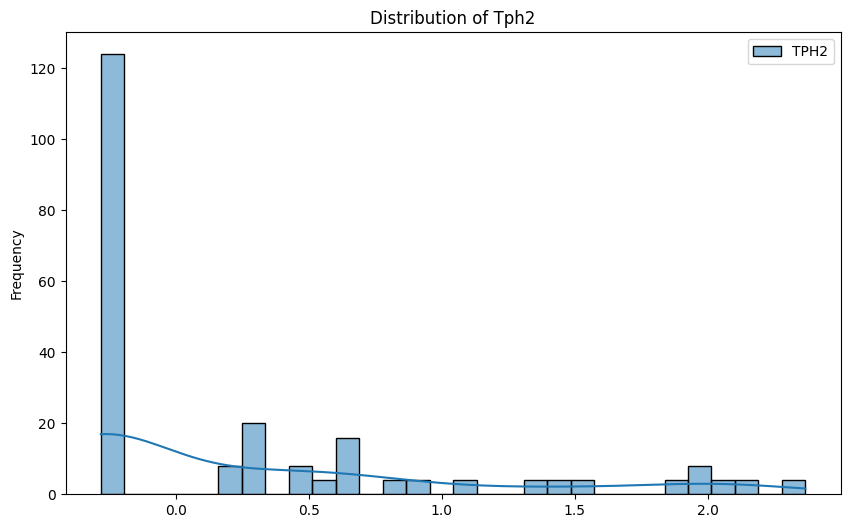

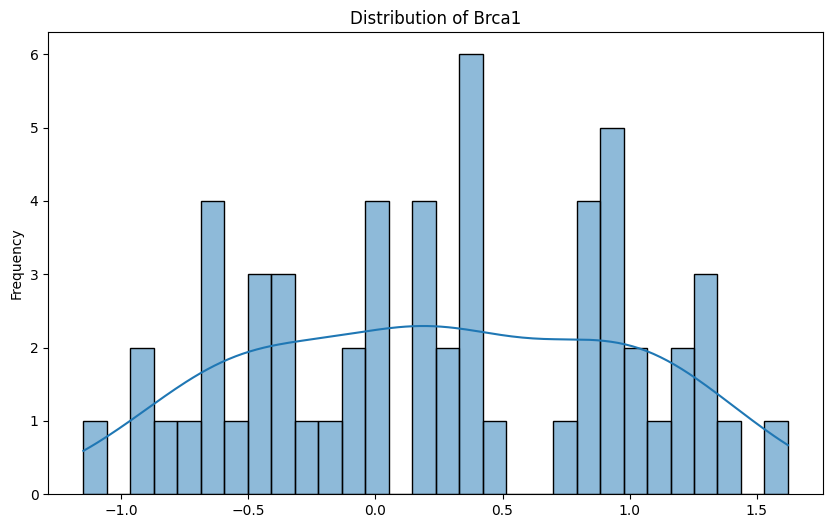

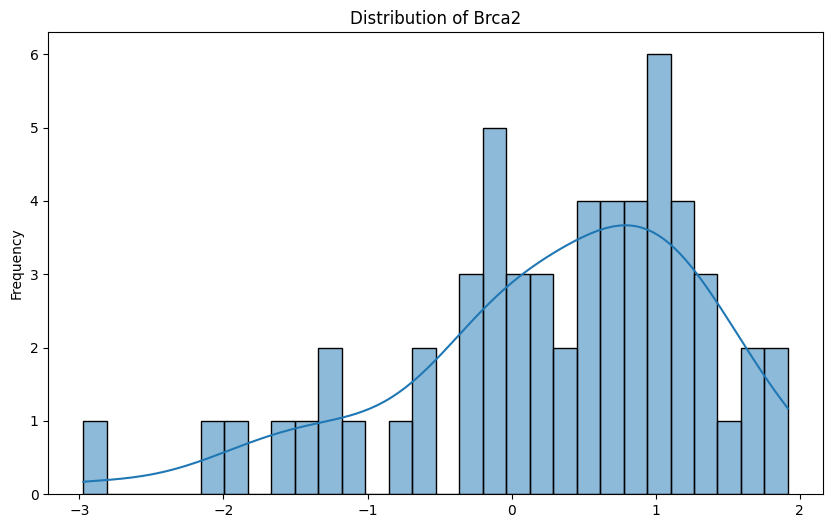

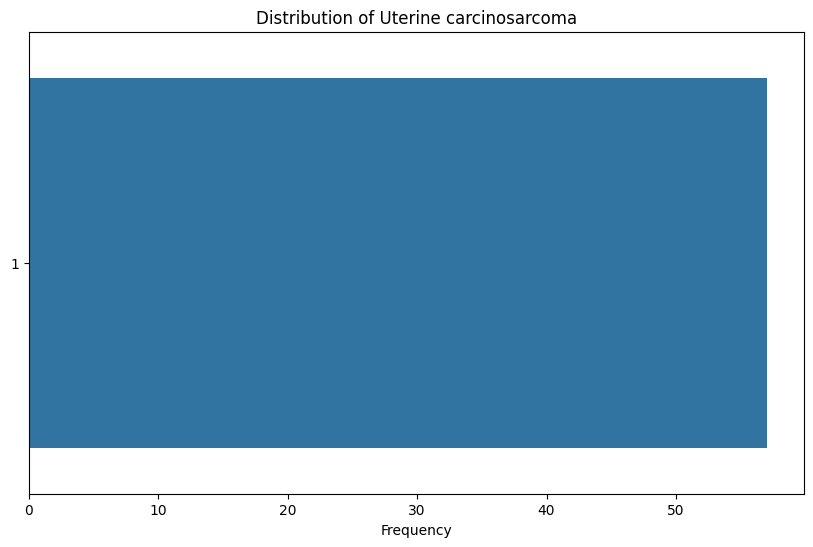

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'brca' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])

In [11]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,depression,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Uterine Carcinosarcoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-N5-A4R8-01,0,-0.957792,6.814974,-0.531035,-0.200472,-0.535378,-1.42261,-0.539194,-0.650946,-0.423399,...,3.273883,-0.262233,1.95401,1.290723,0.343214,-0.852727,-2.000395,-5.091733,0.448188,1
TCGA-N5-A4RA-01,0,-0.436292,6.814374,-0.531035,0.387528,-0.035178,-1.14681,-0.246094,-0.436146,0.150401,...,-1.013317,-1.696233,0.02041,0.931723,0.768414,-2.614627,-0.800295,-5.525533,0.373788,1
TCGA-N5-A4RD-01,0,-1.075592,5.400374,0.337765,-0.327472,-0.623978,-0.76911,0.301706,3.339554,-0.423399,...,1.260083,0.190467,3.92551,0.600623,-0.387886,-0.892127,-0.581895,-3.565233,0.169788,1
TCGA-N5-A4RF-01,0,-0.616892,4.298374,-0.531035,0.068628,-0.272078,-1.90441,-0.123494,3.989854,-0.423399,...,-1.587117,2.072467,3.56111,0.549123,0.902214,0.040173,-0.607895,-3.091133,-0.555412,1
TCGA-N5-A4RJ-01,0,0.275708,5.896174,0.372565,-0.087372,-0.719378,-1.19391,-0.032194,1.065854,-0.423399,...,0.710983,0.398067,1.25191,0.508223,1.239214,0.983573,0.058705,0.255367,-0.002012,1


### 3. Do regression & Cross Validation

In [12]:
import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized


In [13]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: divide by zero encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: divide by zero encountered in divide
  ts = beta / np.sqrt(var * sigma)


The cross-validation accuracy is 58.18% ± 9.27%


In [14]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


In [15]:
# Conduct regression on the whole dataset

var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


### 4. Discussion

In [16]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")

Effect of the condition on the target variable:
Variable: depression
Coefficient: 0.0000
p-value: 1



In [17]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

Genes with corrected p-value < 0.05, affecting the trait Uterine Carcinosarcoma conditional on the factor depression, sorted by corrected p-value:
   Variable  Coefficient  corrected_p_value
      OR6P1         -0.5                0.0
     OR6C65          0.5                0.0
      OR2Y1         -0.5                0.0
      OR8K3         -0.5                0.0
      OR8K5         -0.5                0.0
     OR2T29         -0.5                0.0
     OR2T27          0.5                0.0
    SNORA19          0.5                0.0
   SNORA36B          0.5                0.0
      OR5W2          0.5                0.0
      OR8I2         -0.5                0.0
      OR6C4         -0.5                0.0
    SPINK14         -0.5                0.0
     OR10Z1         -0.5                0.0
    DEFB128         -0.5                0.0
     OR4K17         -0.5                0.0
   HIST1H4G         -0.5                0.0
      TSSK2         -0.5                0.0
  KRTAP10-8      